## Final Project Submission

Please fill out:
* Student name: Jeremy Nguyo 
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Nikita Njoroge
* Blog post URL:


##  DATA PREPARATION

## Importing libraries we may need for our analysis 

In [1]:
# pandas for data analysis and manipulation
import pandas as pd
# numpy for numerical operations
import numpy as np
# seaborn and matplotlib for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# sqlite library for connect to sql database
import sqlite3

## Importing the dataframes

In [2]:
# connect to the sqlite 'im' database file from IMDb
conn = sqlite3.connect('zippedData/im.db')
# view the list of tables in the database
tables_db = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
tables_db

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


#### For our analysis we will use two tables for the IMDb database. Namely: movie_basics and movie_ratings

In [3]:
#Preview of all the columns and the first five rows of the movie_basics table
movie_basics_df = pd.read_sql(""" SELECT * FROM movie_basics; """,conn)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
#Checking to see the datatype, number of columns and rows of the movie_basics table
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
#understanding the parameters we'll be working with
movie_basics_df.nunique()

movie_id           146144
primary_title      136071
original_title     137773
start_year             19
runtime_minutes       367
genres               1085
dtype: int64

In [6]:
#checking for null values in the movie_basic_df
movie_basics_df.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [7]:
#Preview of all the columns and the first five rows of the movie_ratings table
movie_ratings_df = pd.read_sql(""" SELECT * FROM movie_ratings; """,conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [8]:
#Checking to see the datatype, number of columns and rows of the movie_ratings table
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [9]:
#understanding the parameters we'll be working with
movie_ratings_df.nunique()

movie_id         73856
averagerating       91
numvotes          7349
dtype: int64

In [10]:
#checking for null values in the movie_ratings_df
movie_ratings_df.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [11]:
#understanding our data
movie_ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


The two datasets, movie_ratings and movie_basics share the same primary key(movie_id). We will join them using an inner join to  

#### We will also use the dataset from tn movie budgets for our analysis

In [12]:
#Preview of all the columns and the first five rows of the bom dataset
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv')
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
#Checking to see the datatype, number of columns and rows of the movie_budgets table
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [14]:
#understanding the parameters we'll be working with
movie_budgets_df.nunique()

id                    100
release_date         2418
movie                5698
production_budget     509
domestic_gross       5164
worldwide_gross      5356
dtype: int64

In [15]:
#checking for null values in the movies_budgets_df
movie_budgets_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [16]:
#understanding our data
movie_budgets_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


## DATA CLEANING

Checking for Validity, Accuracy, Completeness,Consistency and Uniformity of the Data

#### Cleaning the movie_basics_df

In the movie_basics_df, we will need the genres column and it seems to have some missing values 

In [17]:
#Checking for null values
movie_basics_df['genres'].isnull().sum()

5408

In [18]:
#lets have a look at these missing values
#Filter to select only the missing values
filt = movie_basics_df['genres'].isnull()

#view the missing values and assign them to a variable
genres_missing_values_df =  movie_basics_df.loc[filt]
genres_missing_values_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
16,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,NaN,None
22,tt0253093,Gangavataran,Gangavataran,2018,134.0,None
35,tt0306058,Second Coming,Second Coming,2012,95.0,None
40,tt0326592,The Overnight,The Overnight,2010,88.0,None
44,tt0330811,Regret Not Speaking,Regret Not Speaking,2011,NaN,None
...,...,...,...,...,...,...
146088,tt9907396,Footloose in the Cotswolds - Part 1,Footloose in the Cotswolds - Part 1,2016,118.0,None
146089,tt9907608,Footloose in the Cotswolds - Part 2,Footloose in the Cotswolds - Part 2,2016,102.0,None
146107,tt9910922,Doctor Who Augmented Reality: Times Magazine,Doctor Who Augmented Reality: Times Magazine,2013,NaN,None
146129,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None


In [19]:
#Determining what percentage of rows in this column contain missing values
total_num_rows = len(movie_basics_df['genres'])
total_num_missing_rows = len(genres_missing_values_df['genres'])
percentage = total_num_missing_rows/total_num_rows
percentage

0.037004598204510616

The genre is quite a unique value. You can not just randomly assign a genre to a movie. Being that there are only a few missing values, 3.7% of the total, then i think dropping these rows would be more reasonable

In [20]:
movie_basics_df.dropna(subset='genres')

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [21]:
#dropping the rows with the missing values in the genres column
movie_basics_df.dropna(subset='genres', inplace=True)
#checking to see if the rows have been dropped
movie_basics_df['genres'].isnull().sum()

0

##### Joining the datasets

The two datasets, movie_ratings_df and movie_basics_df, share the same primary key(movie_id) which will be set as the index. We will join them using an inner join to retain the similar key records on both datasets.

In [22]:
movie_ratings_df.set_index('movie_id',inplace=True)
movie_ratings_df

,averagerating,numvotes
movie_id,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
...,...,...
tt9805820,8.1,25
tt9844256,7.5,24
tt9851050,4.7,14


In [23]:
movie_basics_df.set_index('movie_id',inplace=True)
movie_basics_df

,primary_title,original_title,start_year,runtime_minutes,genres
movie_id,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary


In [24]:
#join the two datasets and  assign thme to a new variable
movie_basics_ratings_df = movie_basics_df.join(movie_ratings_df, how='inner')
movie_basics_ratings_df

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [25]:
#reset the index of the dataframe and inspect the data
movie_basics_ratings_df.reset_index(inplace=True)
movie_basics_ratings_df.nunique()

movie_id           73052
primary_title      69248
original_title     70345
start_year            10
runtime_minutes      289
genres               923
averagerating         91
numvotes            7349
dtype: int64

In [26]:
# we seem to have duplicated values for the primary title and original title. Let's inspect further
filt = movie_basics_ratings_df.duplicated(subset=['primary_title'], keep= False)
movie_basics_ratings_df.loc[filt].sort_values(by=['primary_title'])

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
25696,tt2518788,1,1,2013,112.0,"Documentary,History,Sport",8.0,3452
12137,tt1859618,1,1,2019,100.0,Drama,9.2,13
52353,tt5282238,10,10,2015,90.0,Thriller,4.7,7
13686,tt1941430,10,10,2011,NaN,Action,3.4,9
26467,tt2579680,100% Love,100% Love,2012,166.0,"Comedy,Drama,Romance",6.0,296
...,...,...,...,...,...,...,...,...
39286,tt3763866,Zoom,Zoom,2015,96.0,"Animation,Comedy,Drama",6.1,2323
33646,tt3257638,Zurich,Zurich,2015,89.0,Drama,6.0,385
33313,tt3229936,Zurich,Und morgen mittag bin ich tot,2013,103.0,Drama,7.2,214
14137,tt1961689,Éden,Éden,2011,64.0,Documentary,7.1,8


It seems that some movies share the same title but all other attributes are different including the movie_id. I think it's safe to assume that these are all different movies.

#### Cleaning the movie_budgets_df

In the movie_budgets_df, the Id column has repetitive values. See below

In [27]:
print('Number of unique values in the id column are:', movie_budgets_df['id'].nunique(), 'out of a total of:', len(movie_budgets_df['id']))

Number of unique values in the id column are: 100 out of a total of: 5782


Since this column has no other use other than being a unique identifier,It is wise to drop it since it doesn't serve it's purpose. We can use the names column as the index once we inspect it further since it seems to have duplicates.

In [28]:
#dropping the id column
movie_budgets_df.drop(columns='id', inplace=True)
movie_budgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


Let's inspect the movie column and see where we have duplicates

In [29]:
print('The number of unique values in the column is:', movie_budgets_df['movie'].nunique(), 'out of a total of:', len(movie_budgets_df['movie']))

The number of unique values in the column is: 5698 out of a total of: 5782


In [30]:
# filter all the duplicated movie names and sort by the name to inspect the rows further
filt = movie_budgets_df.duplicated(subset=['movie'], keep=False)
movie_budgets_df.loc[filt].sort_values(by=['movie']).head(20)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
4270,"Dec 23, 1954","20,000 Leagues Under the Sea","$5,000,000","$28,200,000","$28,200,000"
5614,"Dec 24, 1916","20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
1648,"Apr 30, 2010",A Nightmare on Elm Street,"$35,000,000","$63,075,011","$117,729,621"
5016,"Nov 9, 1984",A Nightmare on Elm Street,"$1,800,000","$25,504,513","$25,504,513"
2032,"Nov 11, 1992",Aladdin,"$28,000,000","$217,350,219","$504,050,219"
80,"May 24, 2019",Aladdin,"$182,000,000","$246,734,314","$619,234,314"
50,"Mar 5, 2010",Alice in Wonderland,"$200,000,000","$334,191,110","$1,025,491,110"
4759,"Jul 28, 1951",Alice in Wonderland,"$3,000,000",$0,$0
4120,"Oct 17, 1956",Around the World in 80 Days,"$6,000,000","$42,000,000","$42,000,000"
340,"Jun 16, 2004",Around the World in 80 Days,"$110,000,000","$24,004,159","$72,004,159"


In [31]:
#further inspection to see whether we have instances of having both the movie and release_date of one record duplicated 
filt2 = movie_budgets_df.duplicated(subset=['movie','release_date'], keep=False)
movie_budgets_df.loc[filt2].sort_values(by=['movie']).head(60)

,release_date,movie,production_budget,domestic_gross,worldwide_gross


As seen above, even though the names have been duplicated, these are different movies based on the release date. We don't have instances where the name and release date are both similar in one record.  So it's safe to assume that the recent dated movies are remakes of the older ones hence we keep the records. 

The prodcution_budget, domestic_gross and worldwide_gross columns are not integers. This will make computation quite difficult.

In [32]:
#Inspection of the values shows that the values are strings
movie_budgets_df['domestic_gross'].apply(lambda x: type(x))

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
5777    <class 'str'>
5778    <class 'str'>
5779    <class 'str'>
5780    <class 'str'>
5781    <class 'str'>
Name: domestic_gross, Length: 5782, dtype: object

We will have to get rid of the $ sign, the commas and convert the values to integers

In [33]:
# get rid of the $ sig, commas and converting the values into integers and the reassigning the columns
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].apply(lambda x: x[1:]).str.replace(',', '').astype('int64')
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].apply(lambda x: x[1:]).str.replace(',', '').astype('int64')
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(lambda x: x[1:]).str.replace(',', '').astype('int64')

In [34]:
#checking to see if the values have been changed to integers
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 226.0+ KB


In [35]:
#further inspecting the values to see where we have 0 as the values in the worldwide_gross and production_budget columns
filt = (movie_budgets_df['production_budget'] == 0) | (movie_budgets_df['worldwide_gross'] == 0)
missing_gross_amounts_df = movie_budgets_df.loc[filt]
print('The number of records with either the production_budget or world_wide gross as 0 are:', len(missing_gross_amounts_df))
missing_gross_amounts_df

The number of records with either the production_budget or world_wide gross as 0 are: 367


,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,"Dec 31, 2020",Moonfall,150000000,0,0
479,"Dec 13, 2017",Bright,90000000,0,0
480,"Dec 31, 2019",Army of the Dead,90000000,0,0
535,"Feb 21, 2020",Call of the Wild,82000000,0,0
670,"Aug 30, 2019",PLAYMOBIL,75000000,0,0
...,...,...,...,...,...
5761,"Dec 31, 2014",Stories of Our Lives,15000,0,0
5764,"Dec 31, 2007",Tin Can Man,12000,0,0
5771,"May 19, 2015",Family Motocross,10000,0,0
5777,"Dec 31, 2018",Red 11,7000,0,0


In [36]:
#Determining what percentage of rows in this columns contain missing values
total_num_rows = len(movie_budgets_df)
total_num_missing_rows = len(missing_gross_amounts_df)
percentage = total_num_missing_rows/total_num_rows
percentage

0.06347284676582497

6.3% of the values are zeros. These are not values that we can randomly assign since they are unique. 6.3% is not much, so it's best
to just drop these rows.

In [37]:
#lets select the columns with a value of 0 and then drop them
filt = (movie_budgets_df['production_budget'] == 0) | (movie_budgets_df['worldwide_gross'] == 0)
movie_budgets_df.drop(movie_budgets_df[filt].index, inplace=True)
movie_budgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
5775,"May 26, 2006",Cavite,7000,70071,71644
5776,"Dec 31, 2004",The Mongol King,7000,900,900
5778,"Apr 2, 1999",Following,6000,48482,240495
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


In [38]:
#checking whether the rows have been dropped
movie_budgets_df.loc[filt]

,release_date,movie,production_budget,domestic_gross,worldwide_gross


To make the analysis of the movie_budget_df easier, we will extract the year from the release_date column and create a new
colum 'release_year'

In [39]:
#slice through the values of the release_date column and extract the year, convert it to an integer and add it to a new colum
# 'release_year'
movie_budgets_df['release_year'] = movie_budgets_df['release_date'].apply(lambda x:x[-4:]).astype(int)
movie_budgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...,...
5775,"May 26, 2006",Cavite,7000,70071,71644,2006
5776,"Dec 31, 2004",The Mongol King,7000,900,900,2004
5778,"Apr 2, 1999",Following,6000,48482,240495,1999
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2005


In [40]:
#checking to see if the years are all consistent.
movie_budgets_df['release_year'].value_counts().head()

2010    258
2006    253
2008    249
2015    242
2011    241
Name: release_year, dtype: int64

In [41]:
movie_budgets_df.sort_values(by='release_year', ascending=True)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
5677,"Feb 8, 1915",The Birth of a Nation,110000,10000000,11000000,1915
5614,"Dec 24, 1916","20,000 Leagues Under the Sea",200000,8000000,8000000,1916
5683,"Sep 17, 1920",Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4569,"Dec 30, 1925",Ben-Hur: A Tale of the Christ,3900000,9000000,9000000,1925
5606,"Nov 19, 1925",The Big Parade,245000,11000000,22000000,1925
...,...,...,...,...,...,...
1176,"Apr 12, 2019",Hellboy,50000000,21903748,40725492,2019
3835,"Jan 16, 2019",Dragon Ball Super: Broly,8500000,30376755,122747755,2019
496,"Apr 5, 2019",Shazam!,85000000,139606856,362899733,2019
3777,"Feb 13, 2019",Happy Death Day 2U,9000000,28051045,64179495,2019


The dataset contains movies dating from 1915 to 2019. We are going to remove movies that are too old. We are going to use movies from the year 2000 to 2019 which might give a more accurate prediction of the trend.

In [42]:
#filter out the rows with the release year as below 2000
filt = movie_budgets_df['release_year'] < 2000
movie_budgets_df.drop(movie_budgets_df[filt].index, inplace=True)
movie_budgets_df.sort_values(by='release_year')

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
2134,"Dec 22, 2000","O Brother, Where Art Thou?",26000000,45506619,75763814,2000
4281,"Oct 13, 2000",Billy Elliot,5000000,21995263,109253745,2000
3794,"Sep 8, 2000",The Way of the Gun,9000000,6047856,13061935,2000
379,"Dec 15, 2000",The Emperor's New Groove,100000000,89296573,169296573,2000
4322,"Oct 6, 2000",Digimon: The Movie,5000000,9628751,16628751,2000
...,...,...,...,...,...,...
3871,"May 3, 2019",The Intruder,8000000,35095904,36005871,2019
1474,"May 3, 2019",Long Shot,40000000,30202860,43711031,2019
3915,"May 3, 2019",El Chicano,8000000,700261,700261,2019
2520,"Feb 8, 2019",What Men Want,20000000,54611903,69911903,2019


It will also be beneficial in our analysis to have uniformity when discussing movie budgets and profits since the data spans several years, we will adjust for inflation. New columns will be added with inflation adjusted values for production_budget and worldwide_gross

In [43]:
#import the python library to be used to adjust for inflation
import cpi

In [44]:
#create new columns and assign the adjusted values to these columns. Inflation adjustment is based on the release_year
movie_budgets_df["adj_production_budget"] = movie_budgets_df.apply(lambda x: cpi.inflate(x["production_budget"], x["release_year"]), axis=1)
movie_budgets_df["adj_worldwide_gross"] = movie_budgets_df.apply(lambda x: cpi.inflate(x["worldwide_gross"], x["release_year"]), axis=1)

In [45]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,adj_production_budget,adj_worldwide_gross
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,5.367944e+08,3.506651e+09
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,4.946242e+08,1.259646e+09
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,3.709638e+08,1.587326e+08
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,3.779589e+08,1.603998e+09
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3.504304e+08,1.455581e+09


We will create a new column for profit. Profit will be defined as (adj_worldwide_gross - adj_production_budget). Also the production_budget, domestic_gross and worldwide_gross columns will not be needed, so we will drop them

In [46]:
#create a profit column
movie_budgets_df['profit'] =(movie_budgets_df['adj_worldwide_gross']) - (movie_budgets_df['adj_production_budget'])
#dropping the production_budget, domestic_gross and Worlwide_gross columns
movie_budgets_df.drop(columns=['production_budget', 'domestic_gross', 'worldwide_gross'], inplace=True)
movie_budgets_df

,release_date,movie,release_year,adj_production_budget,adj_worldwide_gross,profit
0,"Dec 18, 2009",Avatar,2009,5.367944e+08,3.506651e+09,2.969856e+09
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,2011,4.946242e+08,1.259646e+09,7.650219e+08
2,"Jun 7, 2019",Dark Phoenix,2019,3.709638e+08,1.587326e+08,-2.122312e+08
3,"May 1, 2015",Avengers: Age of Ultron,2015,3.779589e+08,1.603998e+09,1.226039e+09
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,2017,3.504304e+08,1.455581e+09,1.105151e+09
...,...,...,...,...,...,...
5774,"Oct 8, 2004",Primer,2004,1.004124e+04,1.207711e+06,1.197670e+06
5775,"May 26, 2006",Cavite,2006,9.408681e+03,9.629650e+04,8.688782e+04
5776,"Dec 31, 2004",The Mongol King,2004,1.004124e+04,1.291016e+03,-8.750222e+03
5779,"Jul 13, 2005",Return to the Land of Wonders,2005,6.937276e+03,1.856415e+03,-5.080861e+03


## DATA ANALYSIS

# Question 1: What are the most profitable movies and how much should you spend?

Let's add another column showing the profit margin(%). We will achieve this with this formula (profit / adj_production_budget)

In [47]:
#add new column for profit margin
movie_budgets_df['profit_margin'] = movie_budgets_df['profit'] / movie_budgets_df['adj_production_budget']

In [48]:
# A look at the dataframe having sorted the movies with the most profitable ones in descending order
movie_budgets_df.sort_values(by='profit', ascending=False).head(25)

,release_date,movie,release_year,adj_production_budget,adj_worldwide_gross,profit,profit_margin
0,"Dec 18, 2009",Avatar,2009,5.367944e+08,3.506651e+09,2.969856e+09,5.532577
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,2015,3.498349e+08,2.347451e+09,1.997616e+09,5.710167
6,"Apr 27, 2018",Avengers: Infinity War,2018,3.237305e+08,2.210145e+09,1.886415e+09,5.827114
33,"Jun 12, 2015",Jurassic World,2015,2.457990e+08,1.885056e+09,1.639256e+09,6.669092
425,"Dec 17, 2003",The Lord of the Rings: The Return of the King,2003,1.384303e+08,1.680903e+09,1.542472e+09,11.142589
26,"May 4, 2012",The Avengers,2012,2.655481e+08,1.791489e+09,1.525941e+09,5.746382
66,"Apr 3, 2015",Furious 7,2015,2.172178e+08,1.736282e+09,1.519064e+09,6.993278
260,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,2011,1.505797e+08,1.616254e+09,1.465674e+09,9.733545
155,"Nov 22, 2013",Frozen,2013,1.744764e+08,1.480107e+09,1.305630e+09,7.483133
262,"Nov 16, 2001",Harry Potter and the Sorcererâs Stone,2001,1.912549e+08,1.491861e+09,1.300606e+09,6.800381


Just by looking at the data above, it's clear that Avatar is the most profitable movie between the years 2000 to 2019.

In [49]:
#let's get a summary of the statistics 
filt = ['adj_production_budget', 'adj_worldwide_gross', 'profit', 'profit_margin']
movie_budgets_df[filt].describe()

,adj_production_budget,adj_worldwide_gross,profit,profit_margin
count,4.045000e+03,4.045000e+03,4.045000e+03,4045.000000
mean,4.679728e+07,1.316344e+08,8.483716e+07,2.644428
std,5.719648e+07,2.335160e+08,1.932633e+08,13.115029
min,1.526201e+03,2.972453e+01,-2.122312e+08,-0.999974
25%,9.146011e+06,8.276775e+06,-2.507733e+06,-0.349897
50%,2.560584e+07,4.677563e+07,1.536458e+07,0.770907
75%,6.048438e+07,1.432310e+08,8.967170e+07,2.615228
max,5.367944e+08,3.506651e+09,2.969856e+09,430.517853


#### Histogram of Profit

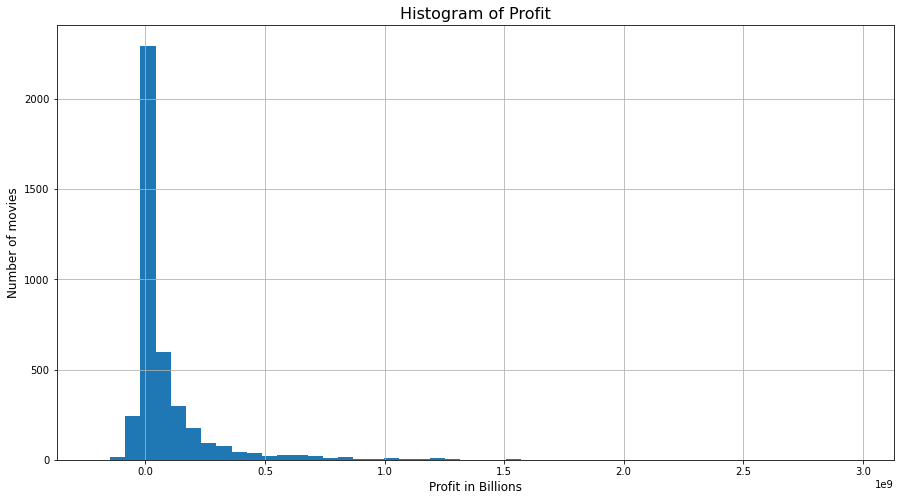

In [50]:
plt.figure(figsize=(15,8))
movie_budgets_df['profit'].hist(bins=50)
plt.xlabel('Profit in Billions', fontsize=12)
plt.ylabel('Number of movies', fontsize =12)
plt.title('Histogram of Profit', fontsize=16);

When looking at the histogram above, it seems most movies either made a loss or made very little in profit. Most of the moves range within this category while very few made profits of 0.5 billion and above. When we look at the summary of statistics we did above, the mean profit lies at 84,000,000  and this can be misleading. The median is about 15,000,000, so the positive outliers are pulling the mean up, so the median will be a better representation of average for our analysis, since it isn't affected by outliers. 

#### Let's have a look at the most profitable movies. The top 20 movies.

In [51]:
#let's assign this to a new variable
most_profitable_movies = movie_budgets_df.sort_values(by='profit', ascending=False)[:20]
most_profitable_movies

,release_date,movie,release_year,adj_production_budget,adj_worldwide_gross,profit,profit_margin
0,"Dec 18, 2009",Avatar,2009,5.367944e+08,3.506651e+09,2.969856e+09,5.532577
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,2015,3.498349e+08,2.347451e+09,1.997616e+09,5.710167
6,"Apr 27, 2018",Avengers: Infinity War,2018,3.237305e+08,2.210145e+09,1.886415e+09,5.827114
33,"Jun 12, 2015",Jurassic World,2015,2.457990e+08,1.885056e+09,1.639256e+09,6.669092
425,"Dec 17, 2003",The Lord of the Rings: The Return of the King,2003,1.384303e+08,1.680903e+09,1.542472e+09,11.142589
26,"May 4, 2012",The Avengers,2012,2.655481e+08,1.791489e+09,1.525941e+09,5.746382
66,"Apr 3, 2015",Furious 7,2015,2.172178e+08,1.736282e+09,1.519064e+09,6.993278
260,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,2011,1.505797e+08,1.616254e+09,1.465674e+09,9.733545
155,"Nov 22, 2013",Frozen,2013,1.744764e+08,1.480107e+09,1.305630e+09,7.483133
262,"Nov 16, 2001",Harry Potter and the Sorcererâs Stone,2001,1.912549e+08,1.491861e+09,1.300606e+09,6.800381


In [52]:
#summary of statistics
filt = ['adj_production_budget', 'adj_worldwide_gross', 'profit', 'profit_margin']
most_profitable_movies[filt].describe()

,adj_production_budget,adj_worldwide_gross,profit,profit_margin
count,2.000000e+01,2.000000e+01,2.000000e+01,20.000000
mean,2.206102e+08,1.691746e+09,1.471135e+09,7.568130
std,1.080160e+08,5.123533e+08,4.225761e+08,2.719077
min,8.460060e+07,1.326556e+09,1.181080e+09,3.243841
25%,1.483311e+08,1.403900e+09,1.235825e+09,5.745109
50%,1.873511e+08,1.485984e+09,1.283445e+09,6.835190
75%,2.507363e+08,1.750084e+09,1.530074e+09,8.948214
max,5.367944e+08,3.506651e+09,2.969856e+09,14.680219


#### Histogram of Profit for the most_profitable_movies

Text(0.5, 1.0, 'Histogram of the Top 20 Most Profitable Movies')

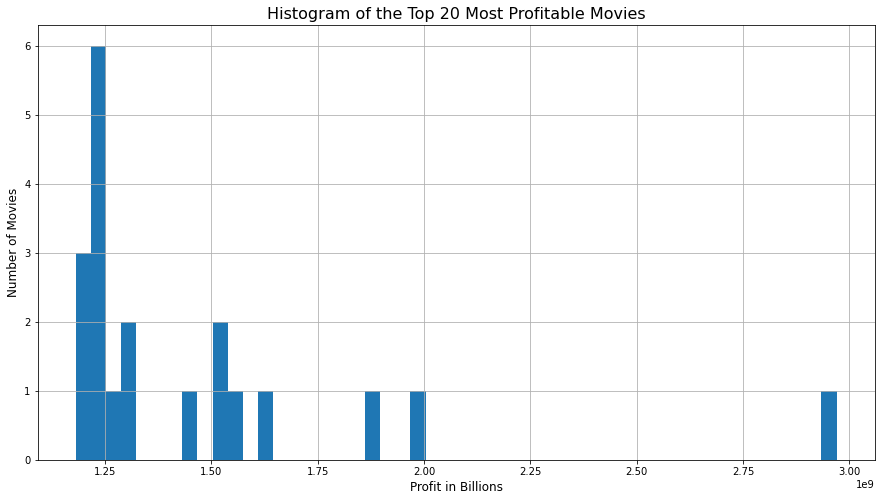

In [53]:
plt.figure(figsize=(15,8))
most_profitable_movies['profit'].hist(bins=50)
plt.xlabel('Profit in Billions', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Histogram of the Top 20 Most Profitable Movies', fontsize=16)

From the histogram it seems that most movies made a profit of about 1.25 billion and we can also spot the outlier, which made close to 3bn in profit. In the summary of statistics we have the median as 1.28 billion thus this is the better representation of the data compared to the mean which is at 1.5billion.

### Now we look at the production budget verse the profit margin of the most profitable movies

Text(0.5, 1.0, 'Production Budget vs Profit of the Most Profitable Movies')

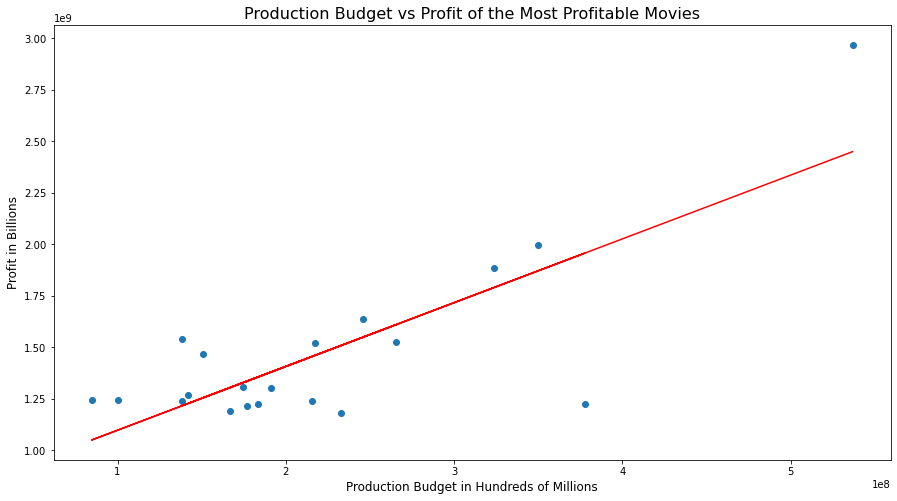

In [54]:
plt.figure(figsize=(15,8))
#define the data
x = most_profitable_movies['adj_production_budget']
y = most_profitable_movies['profit']

#find line of best fit
a,b = np.polyfit(x,y,1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b, color='red')

#label title and labels
plt.xlabel('Production Budget in Hundreds of Millions', fontsize=12)
plt.ylabel('Profit in Billions', fontsize=12)
plt.title('Production Budget vs Profit of the Most Profitable Movies', fontsize=16)